## Tutorial : Img2Img with LORA


生成的 prompt: a woman in a floral dress holding a froth


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<s1>
<s2>


  0%|          | 0/37 [00:00<?, ?it/s]

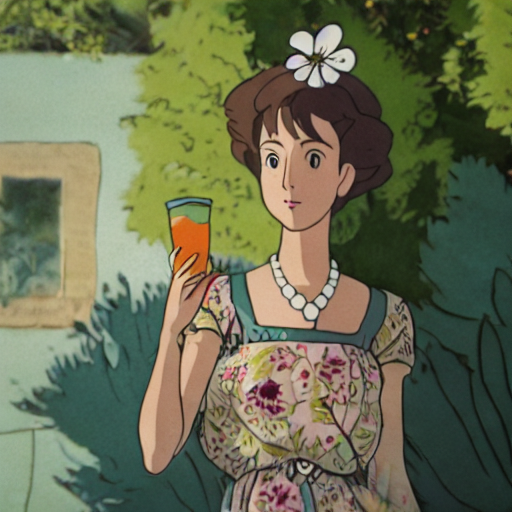

In [4]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
from lora_diffusion import patch_pipe

def generate_prompt_from_image(image_path):
    """
    使用 Hugging Face 的 BLIP 模型根據圖片生成描述。
    
    :param image_path: 圖片檔案路徑
    :return: 圖片描述 (prompt)
    """
    # 初始化處理器與模型
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    # 載入圖像
    image = Image.open(image_path).convert("RGB")

    # 預處理圖像
    inputs = processor(image, return_tensors="pt")

    # 生成文字描述
    with torch.no_grad():
        outputs = model.generate(**inputs)

    # 將生成的 ID 轉換為文字
    prompt = processor.decode(outputs[0], skip_special_tokens=True)
    return prompt

# 測試用例
image_path = "contents/R.jpg"  # 替換成你的圖片檔案路徑
prompt1 = generate_prompt_from_image(image_path)
print(f"生成的 prompt: {prompt1}")



init_image = Image.open(image_path).convert("RGB").resize((512, 512))

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)
prompt = f"style of <s1><s2>, {prompt1}"
patch_pipe(pipe, "step_final_lora.safetensors", patch_text=True, patch_unet=True, patch_ti=True)

torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image


#


In [6]:
import os
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
from lora_diffusion import patch_pipe

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

def generate_prompt_from_image(image_path):

    # 初始化處理器與模型
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    # 載入圖像
    image = Image.open(image_path).convert("RGB")

    # 預處理圖像
    inputs = processor(image, return_tensors="pt")

    # 生成文字描述
    with torch.no_grad():
        outputs = model.generate(**inputs)

    # 將生成的 ID 轉換為文字
    prompt = processor.decode(outputs[0], skip_special_tokens=True)
    return prompt

# 測試用例


# set model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
patch_pipe(pipe, "step_final_lora.safetensors", patch_text=True, patch_unet=True, patch_ti=True)

# path
input_folder = "contents/images/pixabay_images_animal/"
output_folder = "outputs_cartoon_test/"
os.makedirs(output_folder, exist_ok=True)

# parameter

strength = 0.75
guidance_scale = 5.5

# traverse
for file_name in os.listdir(input_folder):
    if file_name.lower().endswith((".png", ".jpg", ".jpeg")):
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, f"processed_{file_name}")
        
        prompt1 = generate_prompt_from_image(input_path)
        print(f"生成的 prompt: {prompt1}")

        # load image
        init_image = Image.open(input_path).convert("RGB").resize((512, 512))

        # set random seed
        torch.manual_seed(1)
        
        prompt = f"style of <s1><s2>, animal"

        # create picture
        image = pipe(prompt=prompt, image=init_image, strength=strength, guidance_scale=guidance_scale).images[0]

        # save picture
        image.save(output_path)
        print(f"處理完成: {output_path}")

print("所有圖片已處理完成！")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

<s1>
<s2>
生成的 prompt: a close up of a lion ' s face


  0%|          | 0/37 [00:00<?, ?it/s]

處理完成: outputs_cartoon_test/processed_image_1.jpg
生成的 prompt: a goat eating grass in a field


  0%|          | 0/37 [00:00<?, ?it/s]

處理完成: outputs_cartoon_test/processed_image_10.jpg
生成的 prompt: a deer standing in the middle of a forest


  0%|          | 0/37 [00:00<?, ?it/s]

處理完成: outputs_cartoon_test/processed_image_100.jpg
生成的 prompt: a butterfly sitting on a leaf with green leaves


  0%|          | 0/37 [00:00<?, ?it/s]

處理完成: outputs_cartoon_test/processed_image_11.jpg
生成的 prompt: arctic fox in snow


  0%|          | 0/37 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

def generate_prompt_from_image(image_path):
    """
    使用 Hugging Face 的 BLIP 模型根據圖片生成描述。
    
    :param image_path: 圖片檔案路徑
    :return: 圖片描述 (prompt)
    """
    # 初始化處理器與模型
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    # 載入圖像
    image = Image.open(image_path).convert("RGB")

    # 預處理圖像
    inputs = processor(image, return_tensors="pt")

    # 生成文字描述
    with torch.no_grad():
        outputs = model.generate(**inputs)

    # 將生成的 ID 轉換為文字
    prompt = processor.decode(outputs[0], skip_special_tokens=True)
    return prompt

# 測試用例
image_path = "contents/R.jpg"  # 替換成你的圖片檔案路徑
prompt = generate_prompt_from_image(image_path)
print(f"生成的 prompt: {prompt}")


生成的 prompt: a woman in a floral dress holding a froth
